In [89]:
#--Malware Detection with Deep Learning Neural Networks

import numpy as np
import pandas as pd
import os

from google.colab import drive
drive.mount('/content/drive')

raw_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/malware_neural_network/Malwaredataset.csv")
raw_data.head()






Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [90]:
raw_data.columns

Index(['hash', 'millisecond', 'classification', 'state', 'usage_counter',
       'prio', 'static_prio', 'normal_prio', 'policy', 'vm_pgoff',
       'vm_truncate_count', 'task_size', 'cached_hole_size', 'free_area_cache',
       'mm_users', 'map_count', 'hiwater_rss', 'total_vm', 'shared_vm',
       'exec_vm', 'reserved_vm', 'nr_ptes', 'end_data', 'last_interval',
       'nvcsw', 'nivcsw', 'min_flt', 'maj_flt', 'fs_excl_counter', 'lock',
       'utime', 'stime', 'gtime', 'cgtime', 'signal_nvcsw'],
      dtype='object')

Column Description of Malwares

| Features Description 	| Properties                                                      	|
|----------------------	|-----------------------------------------------------------------	|
| hash APK/ SHA256     	| file name                                                       	|
| milisecond           	| time                                                            	|
| classification       	| malware/beign                                                   	|
| state                	| flag of unrunable/runnable/stopped tasks                        	|
| usage_counter        	| task structure usage counter                                    	|
| prio                 	| keeps the dynamic priority of a process                         	|
| static_prio          	| static priority of a process                                    	|
| normal_prio          	| priority without taking RT-inheritance into account             	|
| policy               	| planning policy of the process                                  	|
| vm_pgoff             	| the offset of the area in the file, in pages.                   	|
| vm_truncate_count    	| used to mark a vma as now dealt with                            	|
| task_size            	| size of current task.                                           	|
| cached_hole_size     	| size of free address space hole.                                	|
| free_area_cache      	| first address space hole                                        	|
| mm_users             	| address space users                                             	|
| map_count            	| number of memory areas                                          	|
| hiwater_rss          	| peak of resident set size                                       	|
| total_vm             	| total number of pages                                           	|
| shared_vm            	| number of shared pages.                                         	|
| exec_vm              	| number of executable pages.                                     	|
| reserved_vm          	| number of reserved pages.                                       	|
| nr_ptes              	| number of page table entries                                    	|
| end_data             	| end address of code component                                   	|
| last_interval        	| last interval time before thrashing                             	|
| nvcsw                	| number of volunteer context switches.                           	|
| nivcsw               	| number of in-volunteer context switches                         	|
| min_flt              	| minör page faults                                               	|
| maj_flt              	| majör page faults                                               	|
| fs_excl_counter      	| ıt holds file system exclusive resources.                       	|
| lock                 	| the read-write synchronization lock used for file system access 	|
| utime                	| user time                                                       	|
| stime                	| system time                                                     	|
| gtime                	| guest time                                                      	|
| cgtime               	| cumulative group time. Cumulative resource counter              	|
| signal_nvcsw         	| used as cumulative resource counter.                            	|


In [91]:
# read some statistics of the dataset
raw_data.describe(include="all")

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
count,100000,100000.000000,100000,1.000000e+05,100000.0,1.000000e+05,100000.000000,100000.0,100000.0,100000.0,...,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.0,100000.0
unique,100,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,NaN,malware,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1000,NaN,50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,499.500000,NaN,1.577683e+05,0.0,3.069706e+09,18183.900070,0.0,0.0,0.0,...,32.991160,2.053130,117.920240,1.109190,3.204448e+09,385415.451970,4.059310,1.66142,0.0,0.0
std,NaN,288.676434,NaN,9.361726e+05,0.0,2.963061e+05,4609.792765,0.0,0.0,0.0,...,52.730176,13.881382,3.116892,2.160466,0.000000e+00,10144.036494,0.822848,3.26304,0.0,0.0
min,NaN,0.000000,NaN,0.000000e+00,0.0,3.069190e+09,13988.000000,0.0,0.0,0.0,...,0.000000,0.000000,112.000000,0.000000,3.204448e+09,371782.000000,3.000000,0.00000,0.0,0.0
25%,NaN,249.750000,NaN,0.000000e+00,0.0,3.069446e+09,14352.000000,0.0,0.0,0.0,...,1.000000,0.000000,114.000000,0.000000,3.204448e+09,378208.000000,3.000000,0.00000,0.0,0.0
50%,NaN,499.500000,NaN,0.000000e+00,0.0,3.069698e+09,16159.000000,0.0,0.0,0.0,...,9.000000,1.000000,120.000000,0.000000,3.204448e+09,383637.000000,4.000000,0.00000,0.0,0.0
75%,NaN,749.250000,NaN,4.096000e+03,0.0,3.069957e+09,22182.000000,0.0,0.0,0.0,...,46.000000,1.000000,120.000000,1.000000,3.204448e+09,390324.000000,5.000000,1.00000,0.0,0.0


In [92]:
# Check the DataType of our dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   hash               100000 non-null  object
 1   millisecond        100000 non-null  int64 
 2   classification     100000 non-null  object
 3   state              100000 non-null  int64 
 4   usage_counter      100000 non-null  int64 
 5   prio               100000 non-null  int64 
 6   static_prio        100000 non-null  int64 
 7   normal_prio        100000 non-null  int64 
 8   policy             100000 non-null  int64 
 9   vm_pgoff           100000 non-null  int64 
 10  vm_truncate_count  100000 non-null  int64 
 11  task_size          100000 non-null  int64 
 12  cached_hole_size   100000 non-null  int64 
 13  free_area_cache    100000 non-null  int64 
 14  mm_users           100000 non-null  int64 
 15  map_count          100000 non-null  int64 
 16  hiwater_rss        10

In [93]:
#Start Processing- data cleaning
data = raw_data

In [105]:

data['classification'] = data.classification.map({'benign':0, 'malware':1})
data.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,35e61d9b00a30f757d9b96fe5e5e2c89a8ebaa6e5787eb...,428,1,8192,0,3069612032,22225,0,0,0,...,5,0,114,1,3204448256,382466,4,0,0,0
1,32effc5a6bc3b7319b5b7da02a7cc3576d44c1794b335b...,932,1,0,0,3069267968,13996,0,0,0,...,0,1,120,0,3204448256,374488,4,0,0,0
2,com.epocrates.apk,384,0,0,0,3069526016,24475,0,0,0,...,5,2,114,0,3204448256,387447,4,0,0,0
3,2f14c6999815d6a802a5106ed898554c22a6592ca37bd9...,583,1,4096,0,3069992960,15295,0,0,0,...,124,1,112,2,3204448256,388187,5,14,0,0
4,3ad983456b9031e0b7ce169f9d0a41e6964db5c777b5d4...,713,1,0,0,3069812736,14020,0,0,0,...,0,1,120,0,3204448256,372303,3,0,0,0


In [106]:
data["classification"].value_counts()

classification
1    50000
0    50000
Name: count, dtype: int64

In [107]:
# Shuffle data with data-wrangling
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,com.appquiz.educational.games.apk,427,0,0,0,3069812736,16559,0,0,0,...,18,1,120,1,3204448256,392959,5,1,0,0
1,8068747ccbbddb0e9596fd5dad9ac39042ff5c01a8c2ad...,490,1,0,0,3069231104,15325,0,0,0,...,20,1,120,1,3204448256,387502,5,1,0,0
2,3d131647f203a5283ef2488c1d48c93f72b201d422675d...,922,1,0,0,3069759488,15396,0,0,0,...,88,1,112,2,3204448256,387704,5,12,0,0
3,com.epocrates.apk,523,0,4096,0,3069526016,24475,0,0,0,...,11,1,114,0,3204448256,387457,4,1,0,0
4,1c5643426b0d13ddcf0c12830e50252011bd2377e3b800...,755,1,0,0,3070087168,14041,0,0,0,...,2,1,120,0,3204448256,377615,4,0,0,0


In [108]:
#Import drawing tools

import matplotlib.pyplot as plt
import seaborn as sns

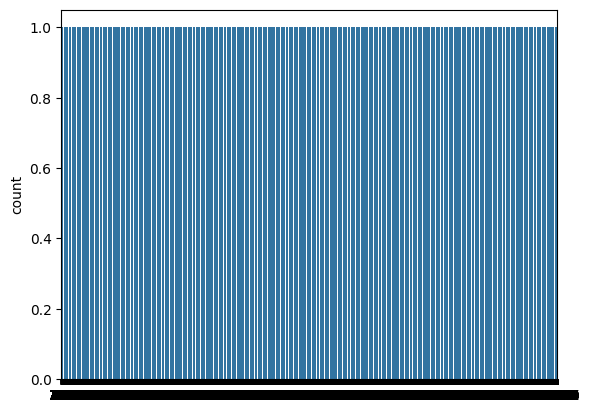

In [30]:
sns.countplot(data["classification"])
plt.show()

In [109]:
X = data.drop(["hash","classification",'vm_truncate_count','shared_vm','exec_vm','nvcsw','maj_flt','utime'],axis=1)
Y = data["classification"]

In [110]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

 Nnormalize the data - Neural Network

In [111]:
# Data normalization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [112]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [113]:
import tensorflow as tf

In [114]:
#Number of attributes
input_size = 27

#Number of Outputs
output_size = 2

# Use same hidden layer size for both hidden layers. Not a necessity.
hidden_layer_size = 50

# define how the model will look like
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, input_shape=(input_size,), activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 50)                1400      
                                                                 
 dense_29 (Dense)            (None, 50)                2550      
                                                                 
 dense_30 (Dense)            (None, 50)                2550      
                                                                 
 dense_31 (Dense)            (None, 50)                2550      
                                                                 
 dense_32 (Dense)            (None, 50)                2550      
                                                                 
 dense_33 (Dense)            (None, 50)                2550      
                                                                 
 dense_34 (Dense)            (None, 2)                

In [115]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [116]:
# set the batch size
batch_size = 100

# set a maximum number of training epochs
max_epochs = 20


early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

In [117]:


result = model.fit(x=x_train,
                   y=y_train,
                   batch_size=batch_size,
                   epochs=max_epochs,
                   verbose=1,
                   #callbacks=[early_stopping],
                   validation_split=0.2)


Epoch 1/20
640/640 [==============================] - 3s 3ms/step - loss: 0.0794 - accuracy: 0.9719 - val_loss: 0.0162 - val_accuracy: 0.9954
Epoch 2/20
640/640 [==============================] - 3s 4ms/step - loss: 0.0084 - accuracy: 0.9975 - val_loss: 0.0017 - val_accuracy: 0.9996
Epoch 3/20
640/640 [==============================] - 2s 4ms/step - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.0025 - val_accuracy: 0.9994
Epoch 4/20
640/640 [==============================] - 2s 3ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0017 - val_accuracy: 0.9997
Epoch 5/20
640/640 [==============================] - 2s 3ms/step - loss: 0.0048 - accuracy: 0.9988 - val_loss: 0.0057 - val_accuracy: 0.9975
Epoch 6/20
640/640 [==============================] - 2s 3ms/step - loss: 0.0026 - accuracy: 0.9993 - val_loss: 7.2671e-04 - val_accuracy: 0.9999
Epoch 7/20
640/640 [==============================] - 2s 3ms/step - loss: 0.0022 - accuracy: 0.9993 - val_loss: 0.0022 - val_accuracy: 0.9995
Ep

<ipython-input-118-57c12cf59d48>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(epochs, loss, "bo", label = "Training loss", color = 'red')
<ipython-input-118-57c12cf59d48>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax2.plot(epochs, val_loss, "b", label = "Validation loss", color = 'red')


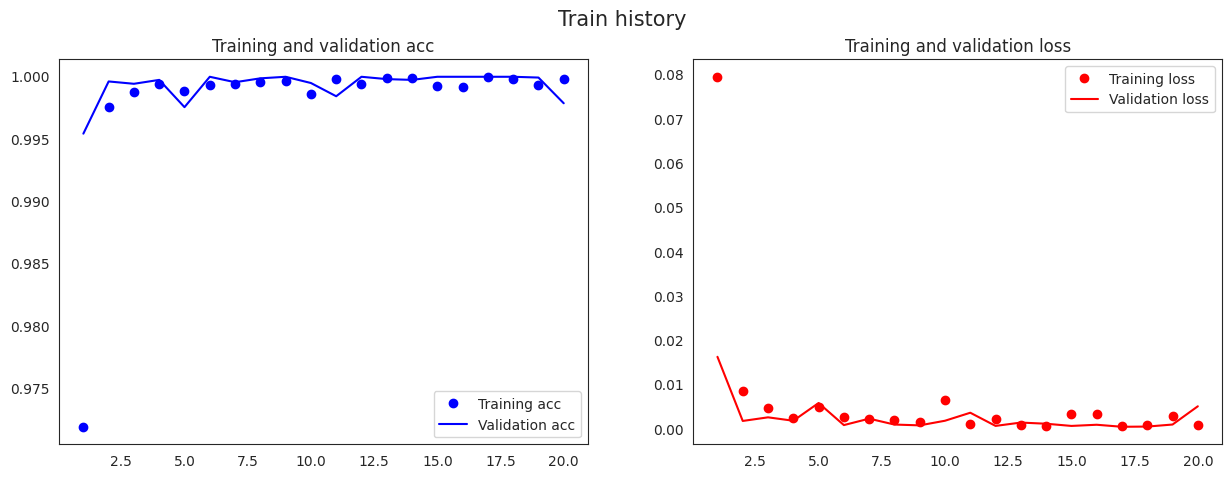

In [118]:
# Visualize the result
acc = result.history['accuracy']
val_acc = result.history['val_accuracy']
loss = result.history['loss']
val_loss = result.history['val_loss']

epochs = range(1, len(acc) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.set_style("white")
plt.suptitle('Train history', size = 15)

ax1.plot(epochs, acc, "bo", label = "Training acc")
ax1.plot(epochs, val_acc, "b", label = "Validation acc")
ax1.set_title("Training and validation acc")
ax1.legend()

ax2.plot(epochs, loss, "bo", label = "Training loss", color = 'red')
ax2.plot(epochs, val_loss, "b", label = "Validation loss", color = 'red')
ax2.set_title("Training and validation loss")
ax2.legend()

plt.show()

In [119]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print('\nTest loss: {0:.6f}. Test accuracy: {1:.6f}%'.format(test_loss, test_accuracy*100.))

625/625 [==============================] - 2s 2ms/step - loss: 0.0049 - accuracy: 0.9984

Test loss: 0.004857. Test accuracy: 99.844998%


Further train the model using SGD with lr=0.001

In [120]:
from keras.optimizers import SGD
sgd = SGD(lr=0.001, momentum=0.9, nesterov=True)
model.compile(optimizer = sgd, loss = "sparse_categorical_crossentropy", metrics=['accuracy'])

In [121]:
result = model.fit(x=x_train,
                   y=y_train,
                   batch_size=batch_size,
                   epochs=30,
                   verbose=1,
                   initial_epoch=10, #start from epoch 11
                   callbacks=[early_stopping], #prevent overfitting
                   validation_split=0.2)

Epoch 11/30
640/640 [==============================] - 3s 3ms/step - loss: 5.2848e-04 - accuracy: 0.9998 - val_loss: 3.0766e-04 - val_accuracy: 0.9998
Epoch 12/30
640/640 [==============================] - 2s 3ms/step - loss: 1.6585e-04 - accuracy: 0.9999 - val_loss: 9.7603e-05 - val_accuracy: 1.0000
Epoch 13/30
640/640 [==============================] - 2s 3ms/step - loss: 1.1648e-04 - accuracy: 1.0000 - val_loss: 1.9468e-04 - val_accuracy: 0.9999
Epoch 14/30
640/640 [==============================] - 2s 3ms/step - loss: 3.4129e-04 - accuracy: 0.9999 - val_loss: 9.1215e-04 - val_accuracy: 0.9999


In [122]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print('\nTest loss: {0:.6f}. Test accuracy: {1:.6f}%'.format(test_loss, test_accuracy*100.))

625/625 [==============================] - 2s 2ms/step - loss: 9.7918e-04 - accuracy: 0.9998

Test loss: 0.000979. Test accuracy: 99.975002%


In [128]:
#-benign : Not Threat
# malware: Threat

data['classification'] = data.classification.map({'benign':0, 'malware':1})
data.head()


,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,com.appquiz.educational.games.apk,427,NaN,0,0,3069812736,16559,0,0,0,...,18,1,120,1,3204448256,392959,5,1,0,0
1,8068747ccbbddb0e9596fd5dad9ac39042ff5c01a8c2ad...,490,NaN,0,0,3069231104,15325,0,0,0,...,20,1,120,1,3204448256,387502,5,1,0,0
2,3d131647f203a5283ef2488c1d48c93f72b201d422675d...,922,NaN,0,0,3069759488,15396,0,0,0,...,88,1,112,2,3204448256,387704,5,12,0,0
3,com.epocrates.apk,523,NaN,4096,0,3069526016,24475,0,0,0,...,11,1,114,0,3204448256,387457,4,1,0,0
4,1c5643426b0d13ddcf0c12830e50252011bd2377e3b800...,755,NaN,0,0,3070087168,14041,0,0,0,...,2,1,120,0,3204448256,377615,4,0,0,0


In [129]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_train)

In [130]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Mean Absolute Error: 1.8125000000000003e-05
Mean Squared Error: 4.71875e-06
Root Mean Squared Error: 0.002172268399622846


In [138]:
#IMPORT RANDOM FOREST CLASSIFIER ALGORITHM
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)


RandomForestClassifier()

In [139]:
y_pred = model.predict(x_train)

In [140]:
y_pred

array([1, 0, 1, ..., 0, 1, 0])

In [141]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix( y_train,y_pred))
print(classification_report( y_train,y_pred))
print(accuracy_score( y_train, y_pred))

[[40079     0]
 [    0 39921]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40079
           1       1.00      1.00      1.00     39921

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000

1.0


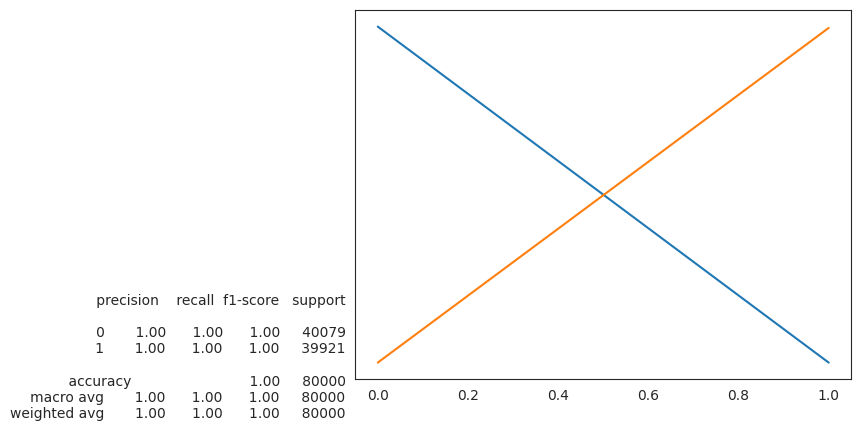

In [142]:
plt.plot(confusion_matrix( y_train,y_pred))
plt.plot(classification_report( y_train,y_pred))
plt.plot(accuracy_score( y_train, y_pred))

In [ ]:
sns.countplot(data['classification'])

<Axes: ylabel='count'>